<h3>Get Stock Data</h3>

In [7]:
from pandas_datareader.data import DataReader 
from datetime import date
import yfinance as yf


currencies = ["BTC-USD","ETH-USD","TTE.PA"] 
start_date = '2021-01-01'
end_date = str(date.today())

yf.pdr_override()
df = DataReader(
    'BTC-USD',
    # 'yahoo',
    start=start_date,
    end=end_date
)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


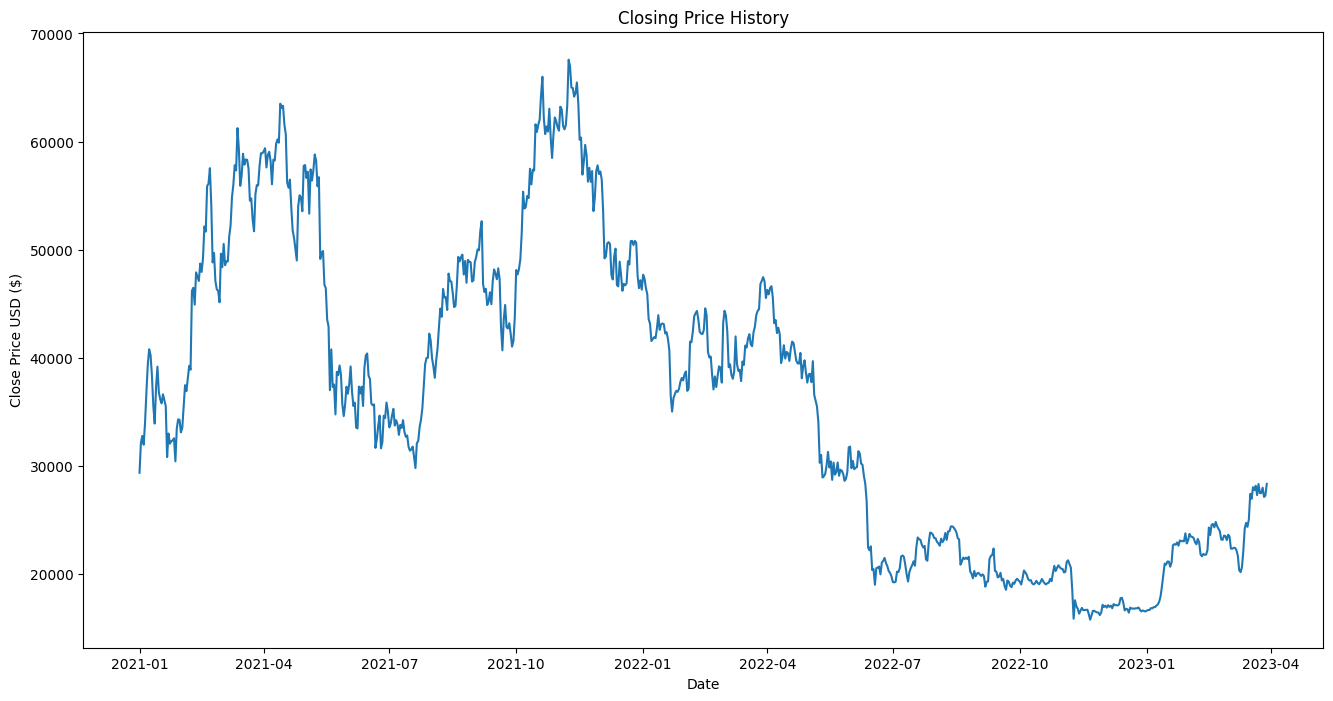

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.ylabel('Close Price USD ($)')
plt.xlabel('Date')
plt.title('Closing Price History')
plt.show()

In [9]:
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = df.filter(['Close']).values
training_data_len = math.ceil(0.8*len(data))

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

train_data = scaled_data[:training_data_len]
test_data = scaled_data[training_data_len:]

# train_data = data[:training_data_len]
# test_data = data[training_data_len:]

x_train , y_train = [] , []

<h1>Neural Network</h1>

In [10]:
import tensorflow as tf

print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {tf.keras.__version__}")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Flatten,
    Reshape,
    Dropout,
    BatchNormalization,
    MaxPooling2D,
    SimpleRNN,
    LSTM,
    GRU,
)

TensorFlow version: 2.12.0
Keras version: 2.12.0


<h3>Hyperparameters and other variable definition</h3>

In [11]:
def create_dataset(dataset , lag :int):
    x , y = [] , []
    for i in range(lag, len(dataset)):
        x.append(dataset[i-lag:i,0])
        y.append(dataset[i,0])
    return np.array(x),np.array(y)

In [12]:
lag = 60
x_train , y_train = create_dataset(train_data,lag)
x_test , y_test = create_dataset(test_data,lag)

In [16]:
# Create a new sequential model
model = Sequential()

model.add( 
    LSTM(100 , return_sequences=True,
         input_shape = (x_train.shape[1] , 1)
    ))

model.add( 
    LSTM(100 , return_sequences=False 
    ))

model.add(Dense(50))
model.add(Dense(1))

2023-03-30 19:37:55.107648: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-03-30 19:37:55.109590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-03-30 19:37:55.110642: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [17]:
#Compile model
model.compile(optimizer='adam' , loss='mean_squared_error')
model.summary()

In [24]:
model.fit(x_train , y_train , batch_size=8 , epochs=50 , verbose=1)

Epoch 1/50
75/75 [==============================] - 3s 38ms/step - loss: 0.0011
Epoch 2/50
75/75 [==============================] - 3s 38ms/step - loss: 0.0012
Epoch 3/50
75/75 [==============================] - 3s 38ms/step - loss: 0.0010
Epoch 4/50
75/75 [==============================] - 3s 38ms/step - loss: 0.0012
Epoch 5/50
75/75 [==============================] - 3s 40ms/step - loss: 0.0012
Epoch 6/50
75/75 [==============================] - 3s 42ms/step - loss: 0.0011
Epoch 7/50
75/75 [==============================] - 3s 40ms/step - loss: 9.9888e-04
Epoch 8/50
75/75 [==============================] - 3s 39ms/step - loss: 0.0011
Epoch 9/50
75/75 [==============================] - 3s 39ms/step - loss: 0.0011
Epoch 10/50
75/75 [==============================] - 3s 39ms/step - loss: 0.0010
Epoch 11/50
75/75 [==============================] - 3s 39ms/step - loss: 9.8521e-04
Epoch 12/50
75/75 [==============================] - 3s 39ms/step - loss: 0.0011
Epoch 13/50
75/75 [==========

In [25]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

train_predictions = scaler.inverse_transform(y_pred_train) 
test_predictions = scaler.inverse_transform(y_pred_test) 

4/4 [==============================] - 0s 16ms/step


In [26]:
rmse  = np.sqrt(np.mean((test_predictions - y_test)**2))
print(rmse)
rmse  = np.sqrt(np.mean(train_predictions - y_train)**2)
print(rmse)

21918.253314967293
39948.87741603116


/tmp/ipykernel_528/1831446059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Learning'] = train_predictions
/tmp/ipykernel_528/1831446059.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = test_predictions


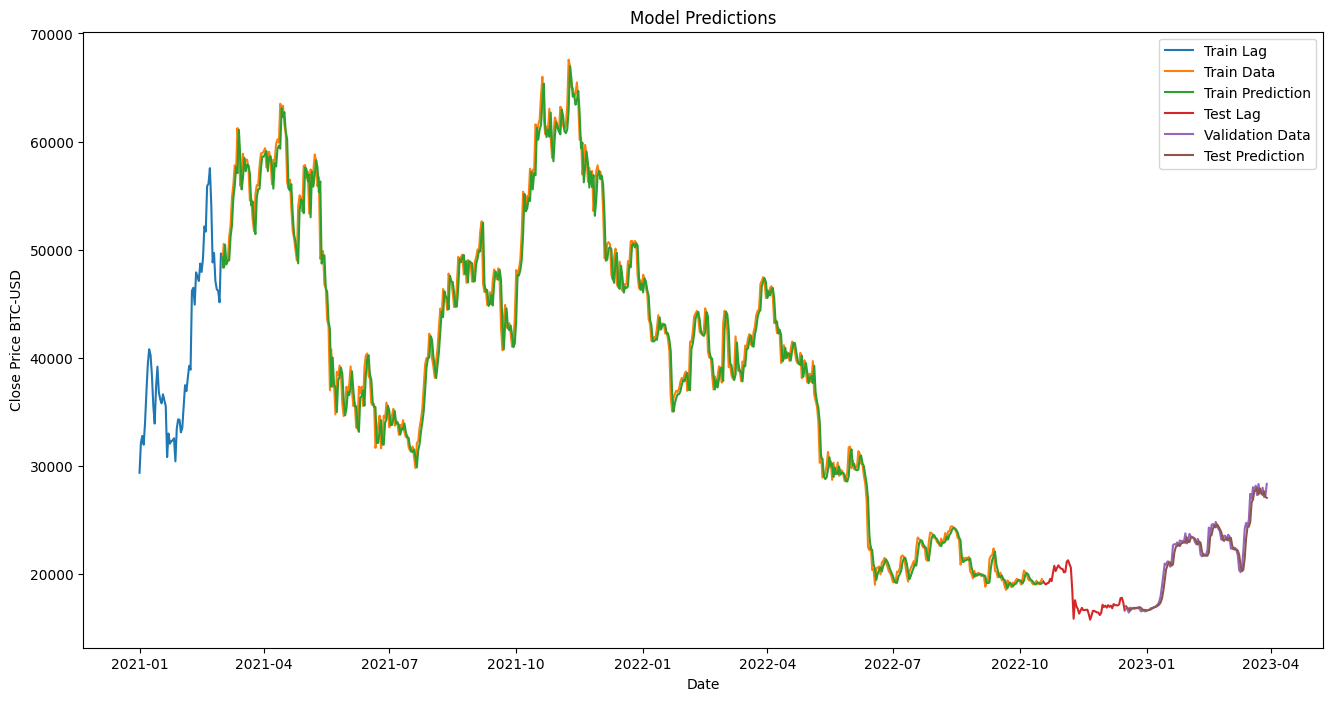

In [27]:
train_lag = df[:60]
train = df[60:training_data_len]
train['Learning'] = train_predictions


test = df[training_data_len:training_data_len+lag]


valid = df[training_data_len+lag:]
valid['Predictions'] = test_predictions

plt.figure(figsize=(16,8))
plt.title('Model Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price BTC-USD')
plt.plot(train_lag['Close'])
plt.plot(train[['Close','Learning']])
plt.plot(test['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train Lag','Train Data','Train Prediction','Test Lag','Validation Data','Test Prediction'])